### **Pembelajaran Mesin H**
### **Rakha Fathin Izzan Consetta / 502522156**
### **Tugas K-Means Clustering #2**

### **Customer Personality Analysis**


In [94]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

#Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#### **Read Data**

In [95]:
df = pd.read_csv('/content/sample_data/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### **Data Assessment**

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Penjelasan Atribut

**Identitas Pelanggan**
1. ID: Pengenal unik pelanggan.
2. Year_Birth: Tahun lahir pelanggan.
3. Education: Tingkat pendidikan pelanggan.
4. Marital_Status: Status pernikahan pelanggan.
5. Income: Pendapatan tahunan rumah tangga pelanggan.
6. Kidhome: Jumlah anak dalam rumah tangga pelanggan.
7. Teenhome: Jumlah remaja dalam rumah tangga pelanggan.
8. Dt_Customer: Tanggal pendaftaran pelanggan dengan perusahaan.
9. Recency: Jumlah hari sejak pembelian terakhir pelanggan.
10. Complain: 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 jika tidak.

**Produk**
11. MntWines: Jumlah yang dihabiskan untuk anggur dalam 2 tahun terakhir.
12. MntFruits: Jumlah yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir.
13. MntMeatProducts: Jumlah yang dihabiskan untuk produk daging dalam 2 tahun terakhir.
14. MntFishProducts: Jumlah yang dihabiskan untuk produk ikan dalam 2 tahun terakhir.
15. MntSweetProducts: Jumlah yang dihabiskan untuk permen dalam 2 tahun terakhir.
16. MntGoldProds: Jumlah yang dihabiskan untuk emas dalam 2 tahun terakhir.


**Promosi**
17. AcceptedCmp1: 1 jika pelanggan menerima penawaran dalam kampanye pertama, 0 jika tidak.
18. AcceptedCmp2: 1 jika pelanggan menerima penawaran dalam kampanye kedua, 0 jika tidak.
19. AcceptedCmp3: 1 jika pelanggan menerima penawaran dalam kampanye ketiga, 0 jika tidak.
20. AcceptedCmp4: 1 jika pelanggan menerima penawaran dalam kampanye keempat, 0 jika tidak.
21. AcceptedCmp5: 1 jika pelanggan menerima penawaran dalam kampanye kelima, 0 jika tidak.
22. Response: 1 jika pelanggan menerima penawaran dalam kampanye terakhir, 0 jika tidak.

**Tempat Transaksi**
23. NumDealsPurchases: Jumlah pembelian dengan diskon.
24. NumWebPurchases: Jumlah pembelian melalui situs web perusahaan.
25. NumCatalogPurchases: Jumlah pembelian menggunakan katalog.
26. NumStorePurchases: Jumlah pembelian langsung di toko.
27. NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir.

In [97]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [98]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Permasalahan yang terdapat pada data:**
1. Terdapat 3 kolom yang berupa categorical. 'Education' merupakan ordinal data, 'Marital Status' merupakan nominal data, 'Dt_Customer' merupakan tanggal yang seharusnya bertipe date
2. 'Income' memiliki beberapa null value
3. Nama kolom banyak yang panjang dan beberapa kolom tidak akan digunakan

#### **Data Cleaning & Feature Engineering**

Mengisi null value pada "Income"

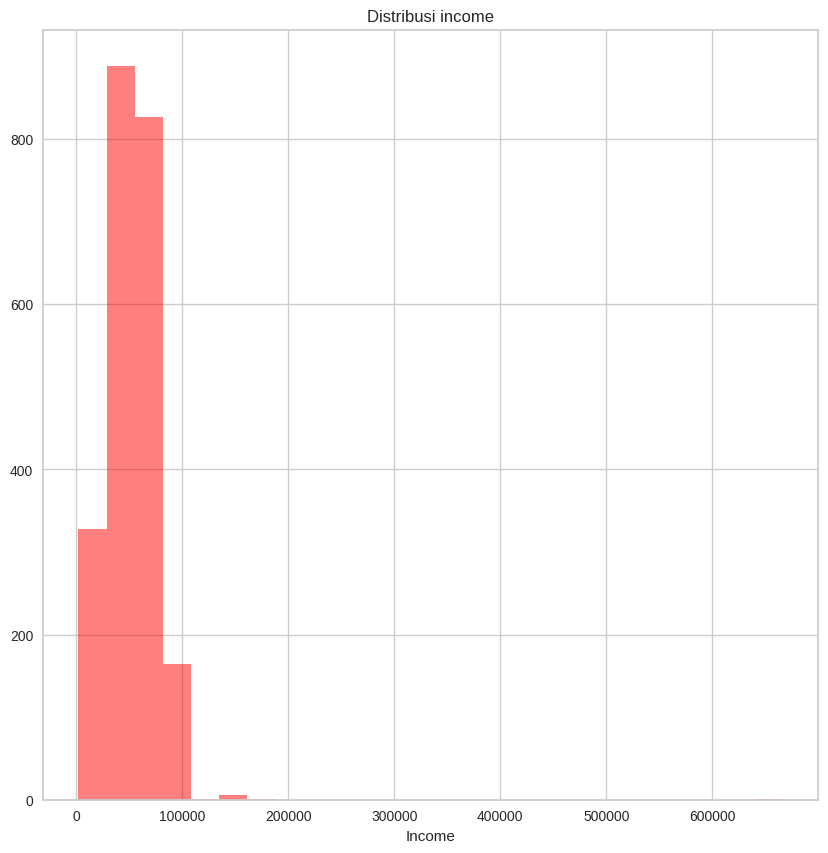

In [99]:
plt.figure(figsize=(10,10))

plt.hist(df['Income'].dropna(), bins=25, color='red', alpha=0.5)
plt.title('Distribusi income')
plt.xlabel('Income')

plt.show()

In [100]:
df['Income'].fillna(df['Income'].median(), inplace=True)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Mengubah 'Dt_Customer' menjadi tipe datetime

In [101]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Berikut adalah beberapa hal yang akan dilakukan untuk feature engineering:
1. Mengganti fitur "Year_Birth" dengan "Age".
2. Menggabungkan semua fitur yang menyatakan produk yang dibeli dalam beberapa kategori menjadi satu fitur "Total_Bought".
3. Menggabungkan semua fitur yang menyatakan jumlah dimana  pembelian terjadi dalam beberapa kategori menjadi satu fitur "Total_Purchases".
4. Membuat fitur baru "Family_Size" yang menggabungkan fitur yang menyatakan jumlah anak dan "Marital_Status".
5. Drop fitur yang tidak digunakan

In [102]:
df["Age"] = 2024-df["Year_Birth"]
df["Age"]

0       67
1       70
2       59
3       40
4       43
        ..
2235    57
2236    78
2237    43
2238    68
2239    70
Name: Age, Length: 2240, dtype: int64

In [103]:
print(df['Marital_Status'].value_counts())
print(df['Education'].value_counts())

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [104]:
df["Products_Bought"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df["Products_Bought"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Products_Bought, Length: 2240, dtype: int64

In [105]:
df["Family_Size"] = df["Marital_Status"].replace({"Married":2, "Together":2, "Alone":1 ,"Absurd":1,
                                                  "Widow":1, "YOLO":1, "Divorced":1, "Single":1}).astype(int)\
                    + df["Kidhome"] + df["Teenhome"]
df["Family_Size"]


0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2240, dtype: int64

In [106]:
df["Total_Purchases"] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
df["Total_Purchases"]

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Total_Purchases, Length: 2240, dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [108]:
dropped = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue",
           "Year_Birth", "ID", "MntMeatProducts", "MntWines", "MntFruits", "MntFishProducts", "MntSweetProducts",
           "MntGoldProds", "Kidhome", "Teenhome", "NumDealsPurchases", "NumWebPurchases",
           "NumCatalogPurchases", "NumStorePurchases", "AcceptedCmp1", "AcceptedCmp2"
           , "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain", "Response"]
df = df.drop(dropped, axis=1)

df = df.rename(columns={"NumWebVisitsMonth": "Monthly_Web_Visit"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Income             2240 non-null   float64
 2   Recency            2240 non-null   int64  
 3   Monthly_Web_Visit  2240 non-null   int64  
 4   Age                2240 non-null   int64  
 5   Products_Bought    2240 non-null   int64  
 6   Family_Size        2240 non-null   int64  
 7   Total_Purchases    2240 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 140.1+ KB


In [109]:
df.describe()

,Income,Recency,Monthly_Web_Visit,Age,Products_Bought,Family_Size,Total_Purchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,49.109375,5.316518,55.194196,605.798214,2.595089,14.862054
std,25037.955891,28.962453,2.426645,11.984069,602.249288,0.906959,7.677173
min,1730.000000,0.000000,0.000000,28.000000,5.000000,1.000000,0.000000
25%,35538.750000,24.000000,3.000000,47.000000,68.750000,2.000000,8.000000
50%,51381.500000,49.000000,6.000000,54.000000,396.000000,3.000000,15.000000
75%,68289.750000,74.000000,7.000000,65.000000,1045.500000,3.000000,21.000000
max,666666.000000,99.000000,20.000000,131.000000,2525.000000,5.000000,44.000000


Menghapus Outlier

Dapat dilihat bahwa pada "Age", max valuenya adalah 131, yang mana itu tidak mungkin, maka akan dilakukan penanganan outlier. Namun sebelum itu, kita visualisasi terlebih dahulu semua fitur agar kita dapat tau fitur apa saja yang terdapat outliernya


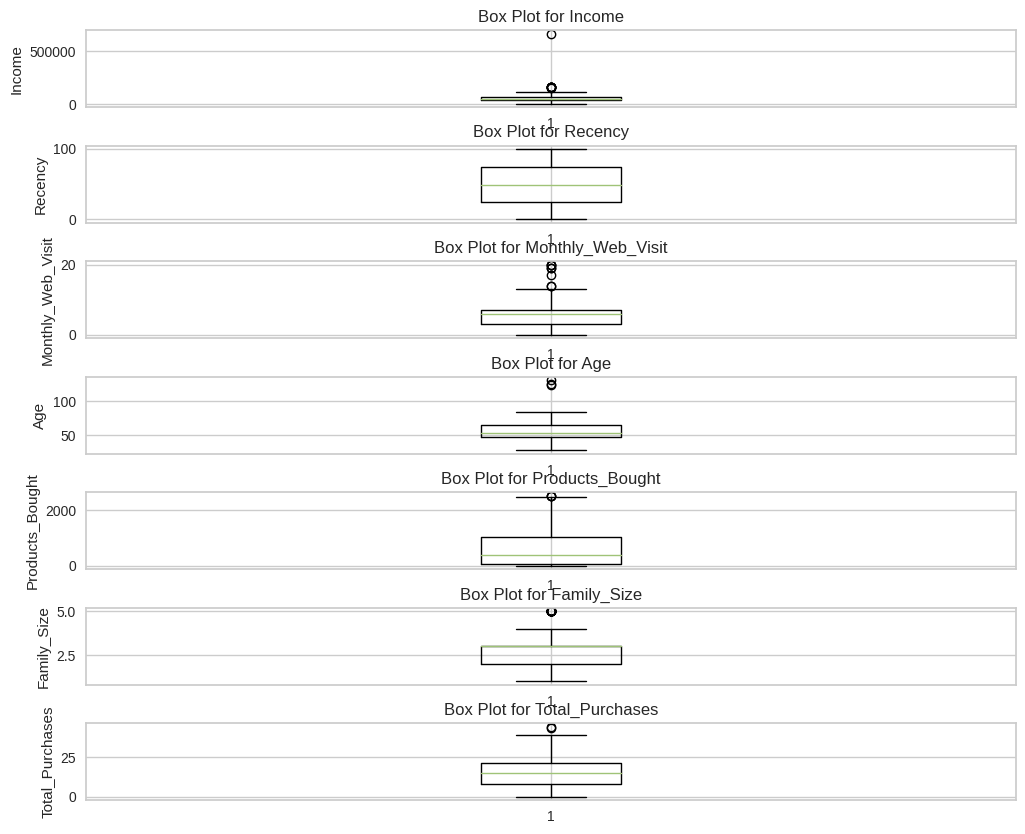

In [110]:
df_col = ['Income', 'Recency', 'Monthly_Web_Visit', 'Age', 'Products_Bought', 'Family_Size', 'Total_Purchases']
fig, axes = plt.subplots(nrows=len(df_col), ncols=1, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(df_col):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Box Plot for {col}')
    axes[i].set_ylabel(col)


plt.show()

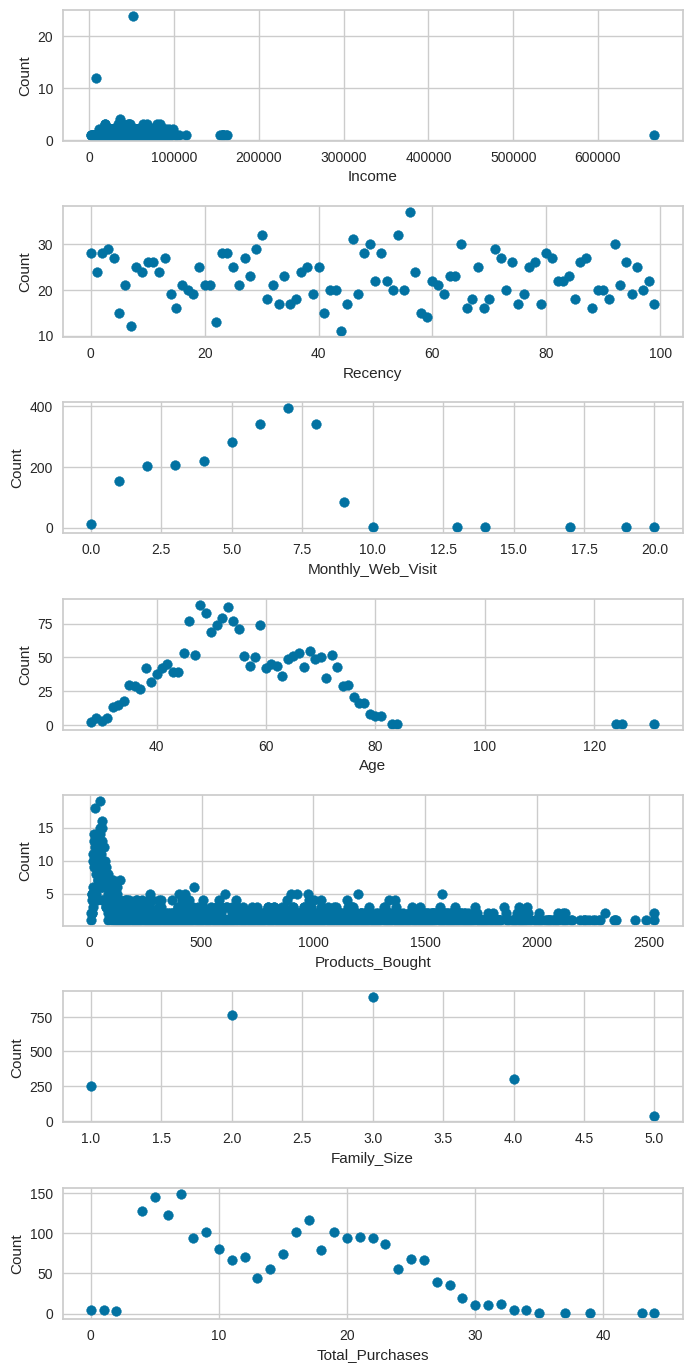

In [111]:
df_col = ['Income', 'Recency', 'Monthly_Web_Visit', 'Age', 'Products_Bought', 'Family_Size', 'Total_Purchases']
fig, axes = plt.subplots(nrows=len(df_col), ncols=1, figsize=(8, 17))
fig.subplots_adjust(hspace=0.5, wspace=0.6)

for i, col in enumerate(df_col):
    counts = df[col].value_counts()
    axes[i].scatter(counts.index, counts.values)
    # axes[i].set_title(f'Scatter Plot for {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')

plt.show()

In [112]:
from scipy import stats

z_scores = stats.zscore(df[df_col])
clean_df = df[(z_scores < 2.5).all(axis=1)]
clean_df.describe()

,Income,Recency,Monthly_Web_Visit,Age,Products_Bought,Family_Size,Total_Purchases
count,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000
mean,51476.978442,48.967548,5.308762,55.011127,589.404265,2.571627,14.823829
std,20246.484720,28.951592,2.281079,11.669294,574.978863,0.863124,7.553306
min,4428.000000,0.000000,0.000000,28.000000,9.000000,1.000000,1.000000
25%,35441.000000,24.000000,4.000000,46.000000,69.000000,2.000000,8.000000
50%,51381.500000,49.000000,6.000000,54.000000,395.000000,3.000000,15.000000
75%,67506.000000,74.000000,7.000000,65.000000,1027.000000,3.000000,21.000000
max,113734.000000,99.000000,10.000000,84.000000,2092.000000,4.000000,34.000000


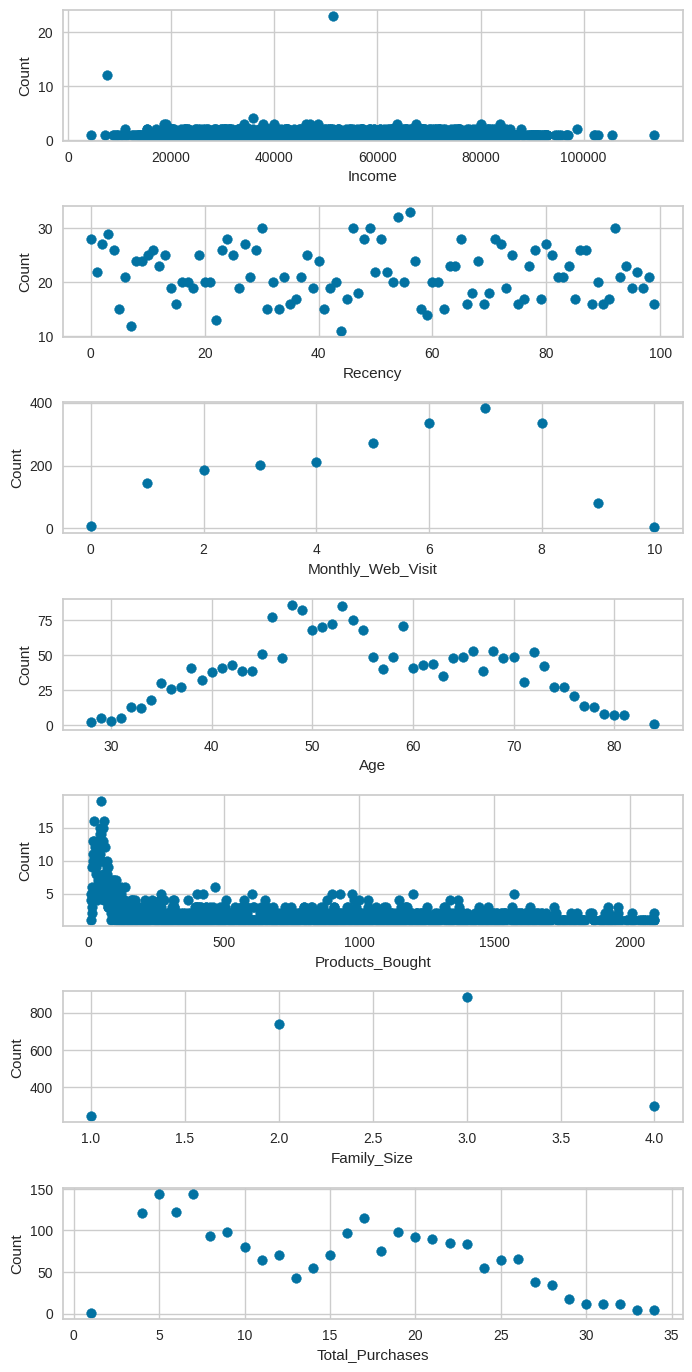

In [113]:
df = clean_df
fig, axes = plt.subplots(nrows=len(df_col), ncols=1, figsize=(8, 17))
fig.subplots_adjust(hspace=0.5, wspace=0.6)

for i, col in enumerate(df_col):
    counts = df[col].value_counts()
    axes[i].scatter(counts.index, counts.values)
    # axes[i].set_title(f'Scatter Plot for {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')

plt.show()

<Axes: >

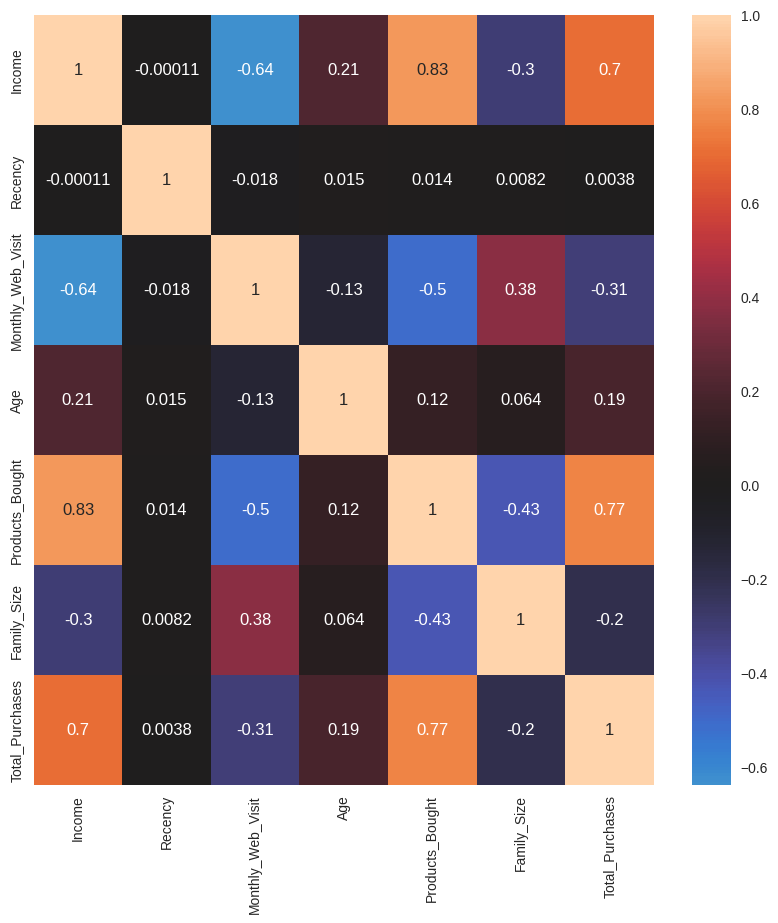

In [114]:
corrmat= df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot=True, center=0)

In [115]:
df['Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2234    Graduation
2235    Graduation
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2157, dtype: object

**Data Preprocessing**

1. Mengubah 'Education' yang merupakaan data categorical menjadi numerik dengan encoding.
2. Normalisasi data

In [116]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Education'], return_df=True,
                            mapping=[{'col':'Education','mapping':{'Basic':0,
                                                                  'Graduation':1,
                                                                  '2n Cycle':2,
                                                                  'Master':3,
                                                                  'PhD':4,}
}])

In [117]:
df_encoded = encoder.fit_transform(df)
print(df_encoded.info())
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2157 non-null   int64  
 1   Income             2157 non-null   float64
 2   Recency            2157 non-null   int64  
 3   Monthly_Web_Visit  2157 non-null   int64  
 4   Age                2157 non-null   int64  
 5   Products_Bought    2157 non-null   int64  
 6   Family_Size        2157 non-null   int64  
 7   Total_Purchases    2157 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 151.7 KB
None


,Education,Income,Recency,Monthly_Web_Visit,Age,Products_Bought,Family_Size,Total_Purchases
0,1,58138.0,58,7,67,1617,1,25
1,1,46344.0,38,5,70,27,3,6
2,1,71613.0,26,4,59,776,2,21
3,1,26646.0,26,6,40,53,3,8
4,4,58293.0,94,5,43,422,3,19


In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df_encoded)
scaled_df = pd.DataFrame(scaler.transform(df_encoded), columns= df_encoded.columns)
scaled_df.head()

,Education,Income,Recency,Monthly_Web_Visit,Age,Products_Bought,Family_Size,Total_Purchases
0,-0.815013,0.329073,0.312057,0.741592,1.027625,1.787603,-1.821281,1.347560
1,-0.815013,-0.253583,-0.378911,-0.135389,1.284769,-0.978357,0.496420,-1.168478
2,-0.815013,0.994775,-0.793493,-0.573880,0.341906,0.324602,-0.662431,0.817867
3,-0.815013,-1.226718,-0.793493,0.303101,-1.286677,-0.933128,0.496420,-0.903632
4,1.540479,0.336730,1.555800,-0.135389,-1.029532,-0.291216,0.496420,0.553021


In [119]:
X = scaled_df.iloc[:,0:].values
X

array([[-0.81501261,  0.32907274,  0.312057  , ...,  1.78760314,
        -1.82128132,  1.34755957],
       [-0.81501261, -0.25358322, -0.37891149, ..., -0.97835714,
         0.49642004, -1.16847842],
       [-0.81501261,  0.9947747 , -0.79349258, ...,  0.3246015 ,
        -0.66243064,  0.81786736],
       ...,
       [-0.81501261,  0.27191376,  1.452155  , ...,  1.13351442,
        -1.82128132,  0.55302126],
       [ 0.75531539,  0.87778901, -1.41536421, ...,  0.44115455,
         0.49642004,  1.08271346],
       [ 1.5404794 ,  0.06876968, -0.30981464, ..., -0.72611548,
         1.65527072, -0.50636316]])

**Elbow Method**

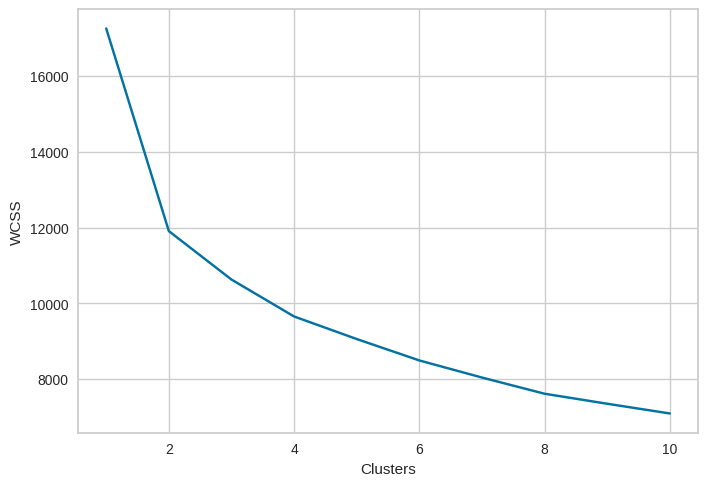

In [120]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

**Sihouette Score**

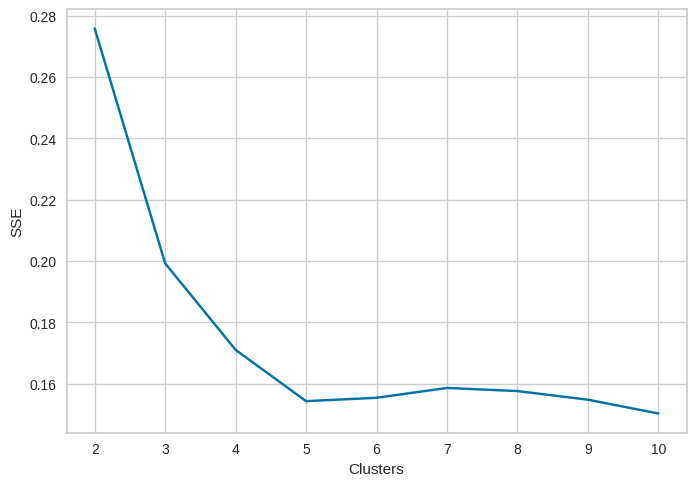

In [121]:
from sklearn.metrics import silhouette_score

sse = []
for i in range(2,11):
  km = KMeans(n_clusters=i, random_state=42)
  km.fit_predict(X)
  score = silhouette_score(X, km.labels_, metric='euclidean')
  sse.append(score)

plt.plot(np.arange(2,11),sse)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

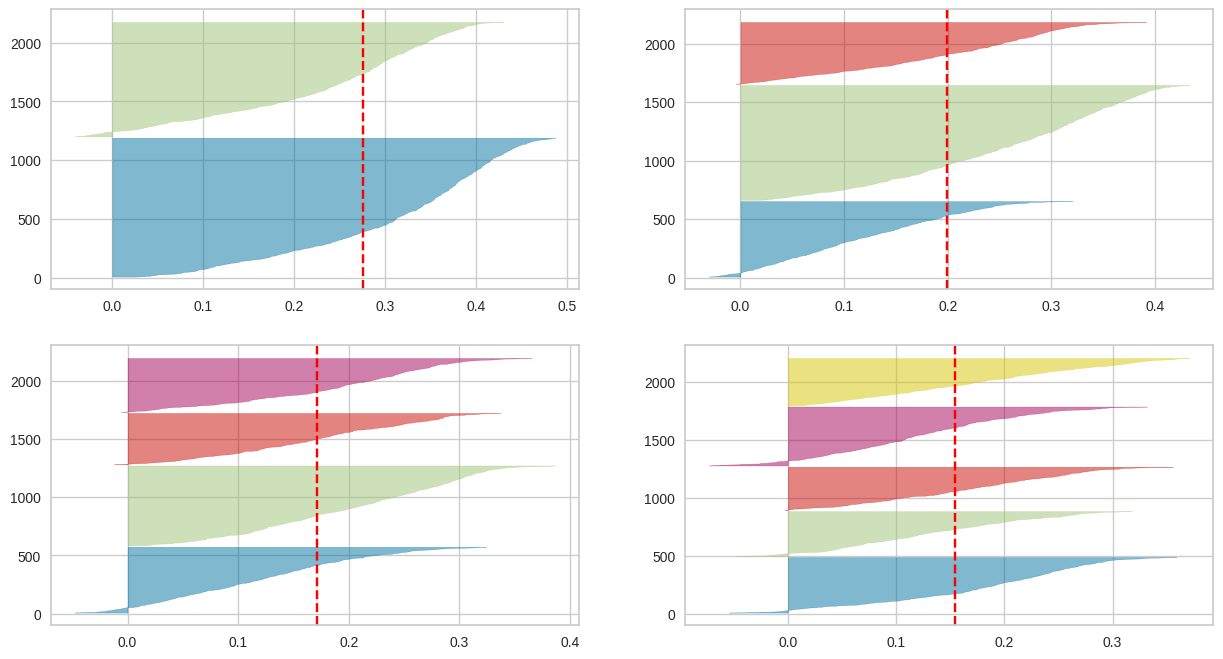

In [122]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in range(2,6):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Ditemukan dengan metode elbow dan sihouette score bahwa jumlah n_cluster
yang optimal adalah 2



**Implementasi K-Means**

In [127]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=12)

labels = kmeans.fit_predict(X)
labels

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

In [130]:
df['Cluster'] = labels
df.head()

,Education,Income,Recency,Monthly_Web_Visit,Age,Products_Bought,Family_Size,Total_Purchases,Cluster
0,Graduation,58138.0,58,7,67,1617,1,25,1
1,Graduation,46344.0,38,5,70,27,3,6,0
2,Graduation,71613.0,26,4,59,776,2,21,1
3,Graduation,26646.0,26,6,40,53,3,8,0
4,PhD,58293.0,94,5,43,422,3,19,1


In [139]:
cluster_groups = df.groupby('Cluster')

cluster_statistics = cluster_groups.mean()

cluster_statistics

,Income,Recency,Monthly_Web_Visit,Age,Products_Bought,Family_Size,Total_Purchases
Cluster,,,,,,,
0,36689.278529,48.578191,6.499577,53.002536,152.296703,2.887574,9.538462
1,69437.809035,49.440452,3.862423,57.450719,1120.305955,2.187885,21.243326


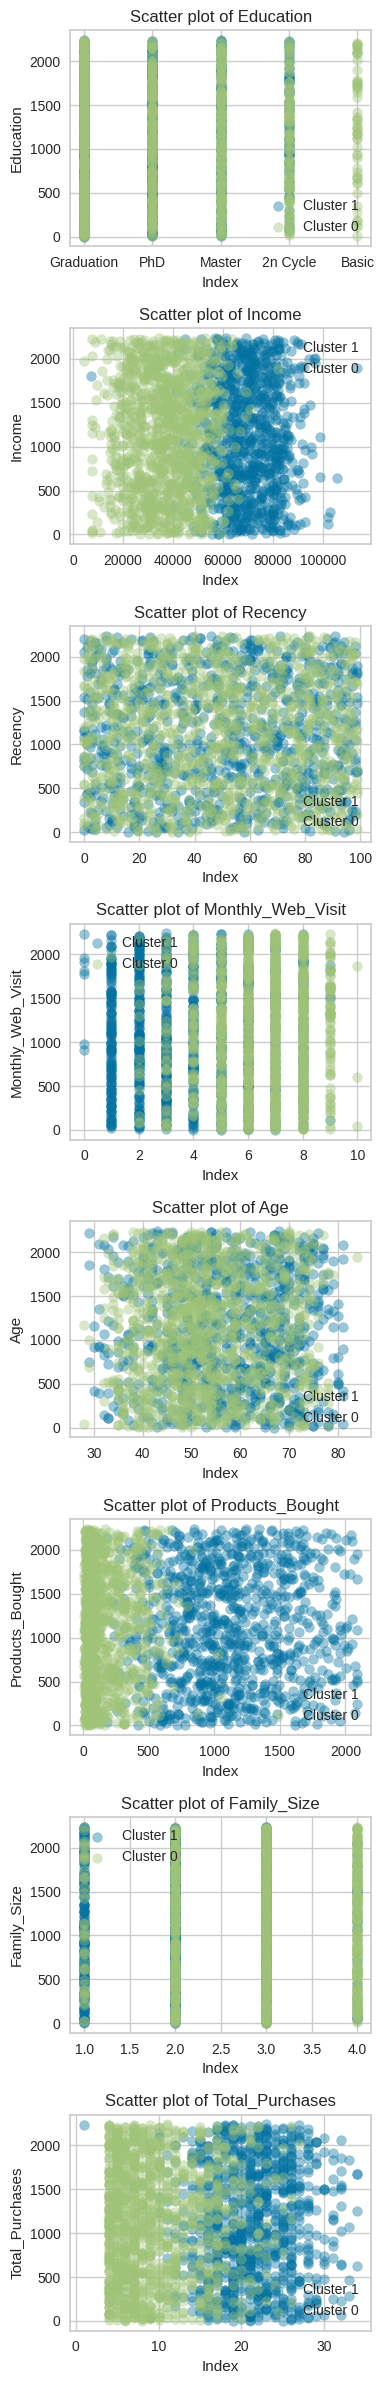

In [144]:

features = [col for col in df.columns if col != 'Cluster']

fig, axs = plt.subplots(nrows=len(features), ncols=1, figsize=(4, 3*len(features)))

for i, feature in enumerate(features):
    ax = axs[i] if len(features) > 1 else axs  # If there's only one feature, axs is not an iterable
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        ax.scatter(cluster_data[feature], cluster_data.index, label=f'Cluster {cluster}', alpha=0.4)
    ax.set_xlabel('Index')  # You can change this to whatever makes sense for your data
    ax.set_ylabel(feature)
    ax.set_title(f'Scatter plot of {feature}')
    ax.legend()

plt.tight_layout()
plt.show()


**Kesimpulan dan Analisis Hasil K-Means**

Setelah dilakukan k-means clustering, dapat dilakukan analisis dengan melihat statistika nilai tengah per cluster dan melihat visualisasinya:
1. Cluster Pertama:

  a. Income = Pendapatan rendah

  b. Recency = Terakhir belanja sekitar 1-2 bulan terakhir

  c. Monthly_Web_Visit = Lebih sering mengunjungi website

  d. Age = Lebih muda sedikit dibanding cluster kedua

  e. Products_Bought = Sedikit membeli barang

  f. Family_Size = Relatif lebih banyak jumlah keluarganya

  g. Total_Purchases = Lebih jarang melakukan transaksi

2. Cluster kedua:

  a. Income = Pendapatan tinggi

  b. Recency = Terakhir belanja sekitar 1-2 bulan terakhir

  c. Monthly_Web_Visit = Lebih jarang mengunjungi website

  d. Age = Sedikit lebih tua dibanging cluster pertama

  e. Products_Bought = Banyak membeli barang

  f. Family_Size = Relatif lebih sedikit jumlah keluarganya

  g. Total_Purchases = Sering melakukan transaksi

Berikut adalah visualisasi antar fitur setelah dibagi menjadi 2 cluster

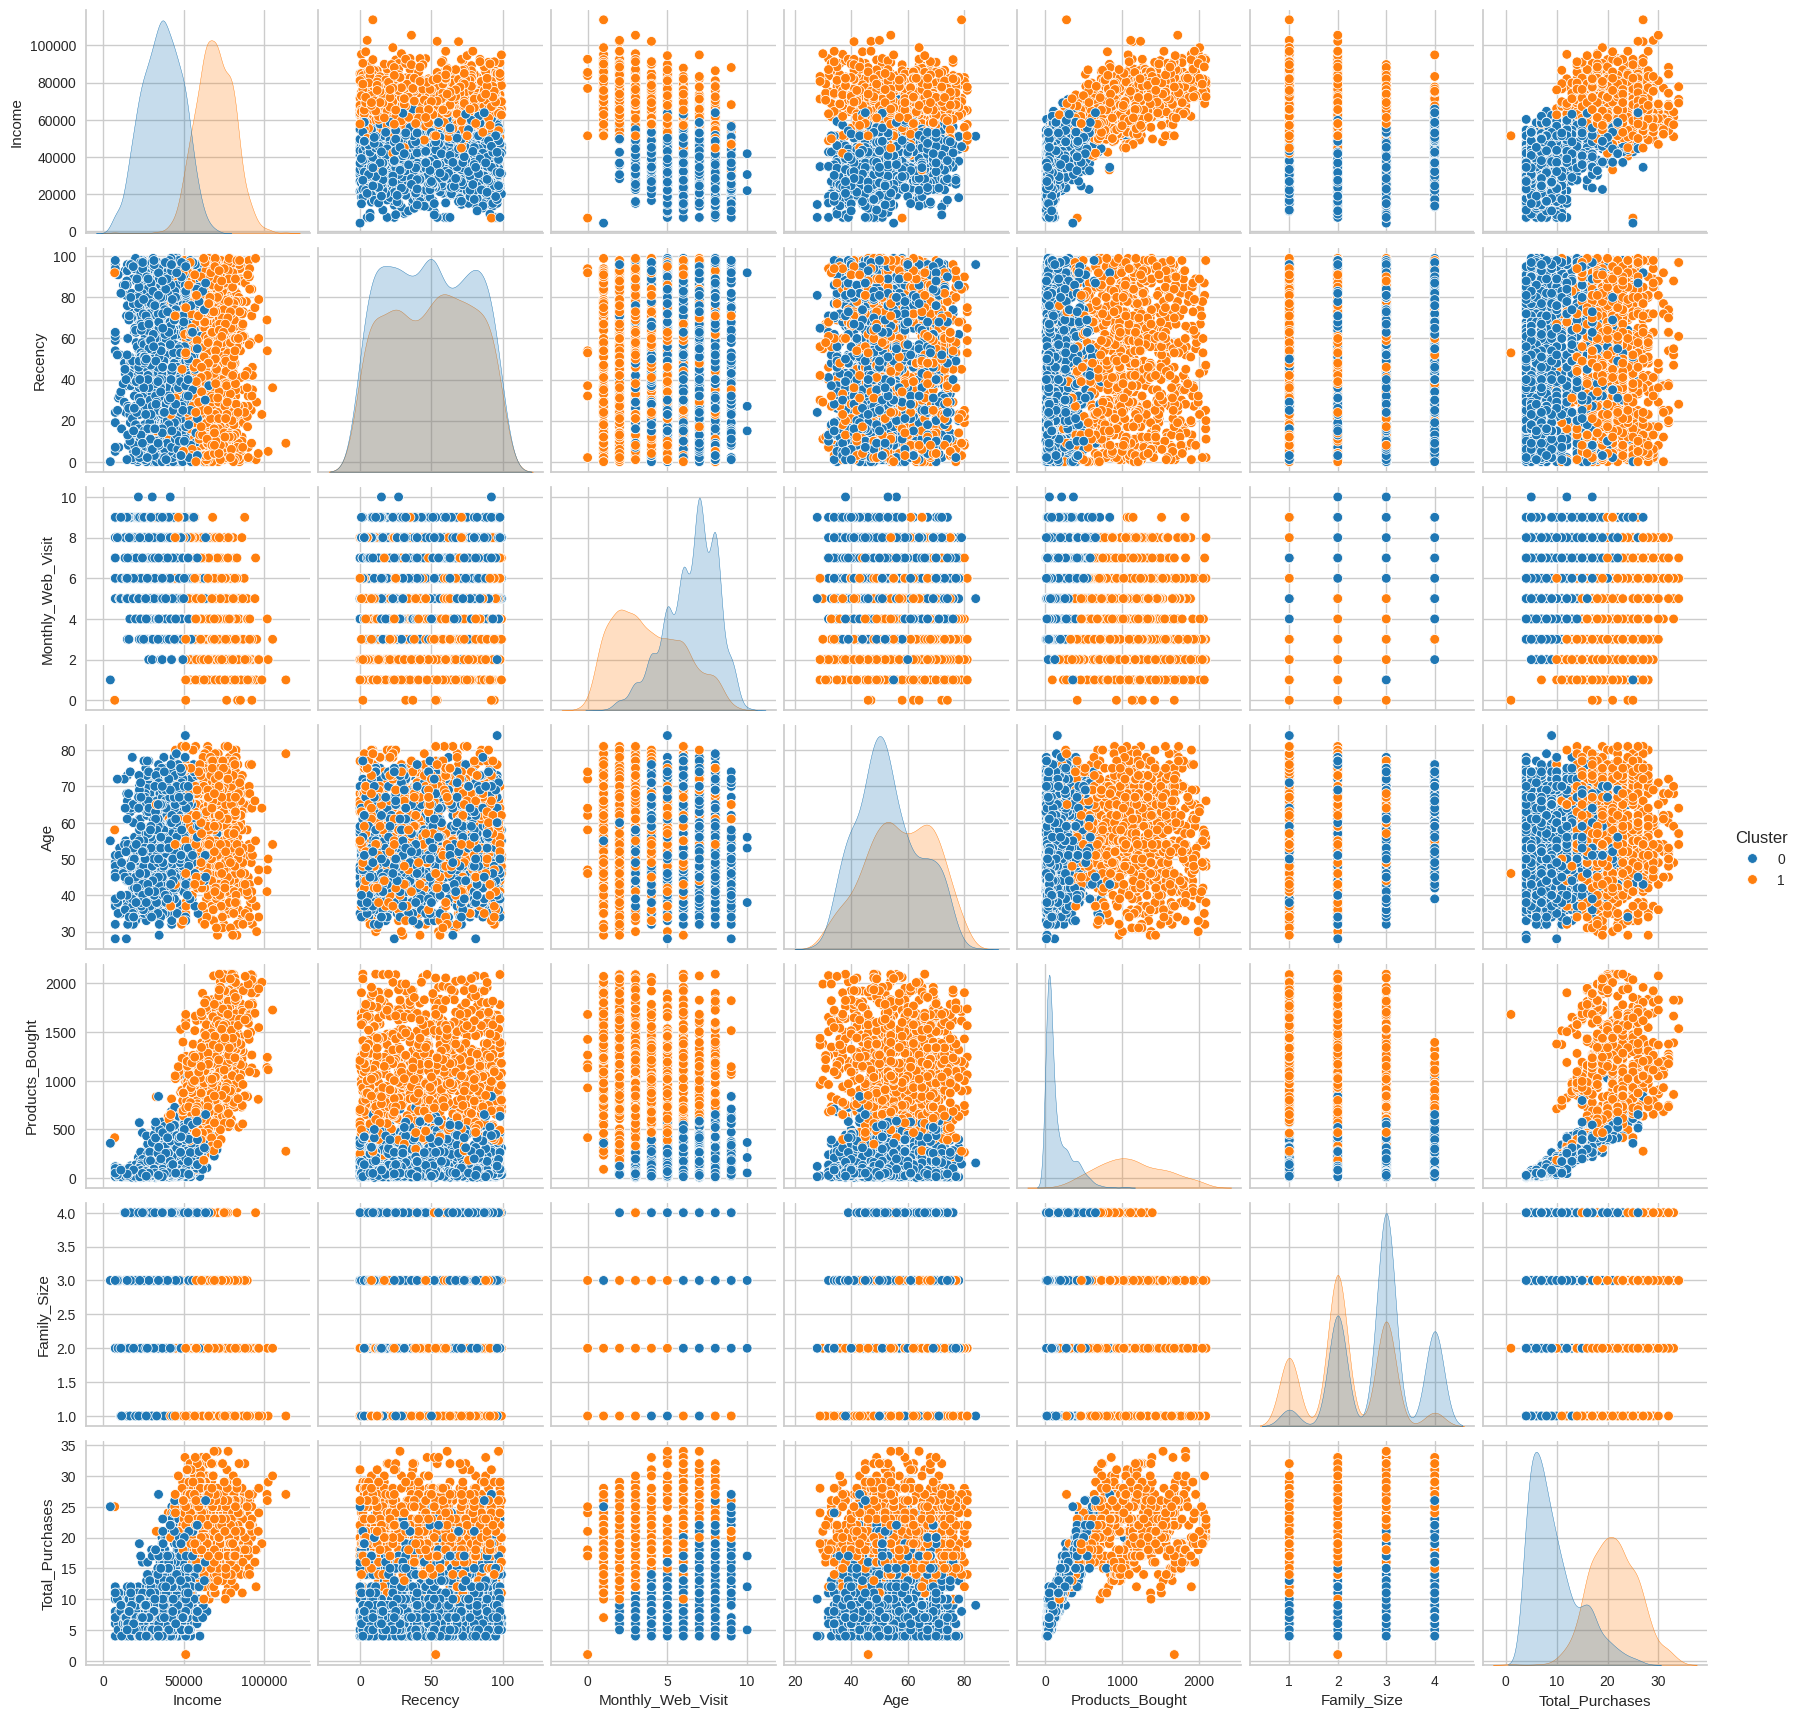

In [145]:
features.append('Cluster')

sns.pairplot(df[features], hue='Cluster', palette='tab10')
plt.show()
